In [73]:
import pandas as pd 
df= pd.read_csv('titanic-passengers.csv',";")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [74]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [75]:
#preparing data for logistic regression
df["Survived"]=df["Survived"].map({"Yes": 1, "No": 0})   #convert admitted variable into numerical
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [76]:
#import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [77]:
#features extraction
x = df[['Age','Pclass','Parch']]
y = df['Survived']

In [78]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  #splitting data with test size of 25%

In [79]:
logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.69


<AxesSubplot:xlabel='Age', ylabel='Survived'>

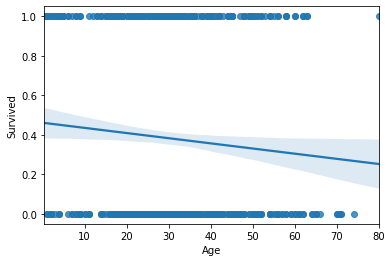

In [80]:
import seaborn as sns
sns.regplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

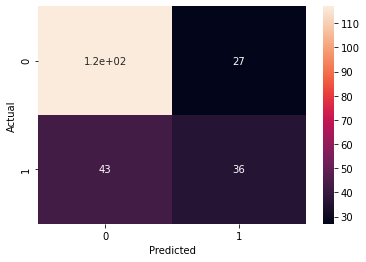

In [82]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [83]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.81      0.77       144
           1       0.57      0.46      0.51        79

    accuracy                           0.69       223
   macro avg       0.65      0.63      0.64       223
weighted avg       0.67      0.69      0.68       223



In [ ]:
#Accuracy 0.7 --> correct observations
#Out of all the survived passengers that got survived, we got 0.46 correct
#Out of all the passengers that we predicted to be ‘Survived’,  we got  0.57 right